In [1]:
import os

if not os.path.isfile("../geoplot/data/nyc_census_tracts/census_tracts_2010.geojson"):
    import requests
    with open("../geoplot/data/nyc_census_tracts/nyc_census_tracts_2010.geojson", "w") as f:
        f.write(requests.get("https://raw.githubusercontent.com/dwillis/nyc-maps/master/census_tracts_2010.geojson").text)

In [7]:
census_tracts = gpd.read_file("../geoplot/data/nyc_census_tracts/census_tracts_2010.geojson", driver='GeoJSON')

In [12]:
%matplotlib inline

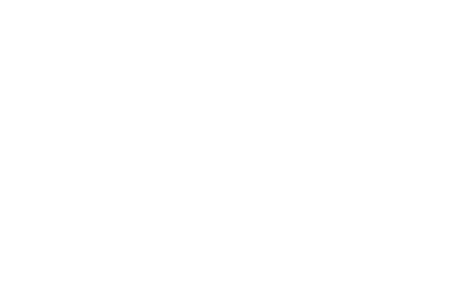

In [13]:
import geoplot as gplt
import geoplot.crs as gcrs
gplt.polyplot(census_tracts.sample(1), projection=gcrs.PlateCarree())

In [18]:
import pandas as pd

In [19]:
collisions = pd.read_csv("../geoplot/data/nyc_collisions/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

In [21]:
import shapely

In [22]:
def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return shapely.geometry.Point(0, 0)
    else:
        return shapely.geometry.Point(long, lat)

collisions = gpd.GeoDataFrame(collisions.head(100000), geometry=collisions.head(100000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

In [24]:
import matplotlib.pyplot as plt

In [26]:
boroughs = gpd.read_file("../geoplot/data/nyc_boroughs/boroughs.geojson", driver='GeoJSON')

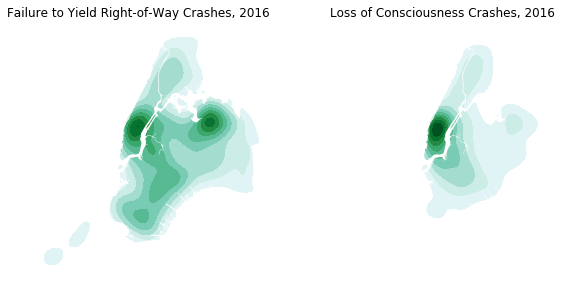

In [27]:
fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(121, projection=gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059))

gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Failure to Yield Right-of-Way'],
             projection=gcrs.AlbersEqualArea(), shade=True, clip=boroughs.geometry, shade_lowest=False, ax=ax1)
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax1)
plt.title("Failure to Yield Right-of-Way Crashes, 2016")

ax2 = plt.subplot(122, projection=gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059))

gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Lost Consciousness'],
             projection=gcrs.AlbersEqualArea(), shade=True, clip=boroughs.geometry, shade_lowest=False, ax=ax2)
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax2)
plt.title("Loss of Consciousness Crashes, 2016")

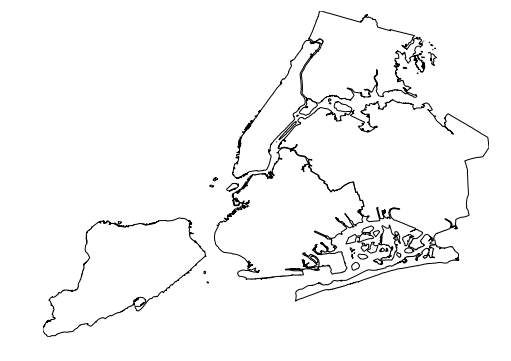

In [29]:
gplt.polyplot(boroughs)

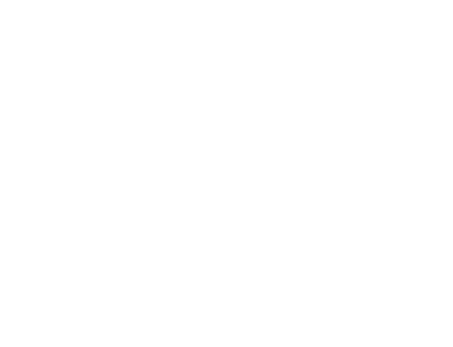

In [30]:
gplt.polyplot(boroughs, projection=gcrs.PlateCarree())